In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# Load and explore data
data_path = '/home/hlife/Mamba-experiment/attention_difference/experiments/alpha_beta_stats_08234341/5a7bb1315542997c3ec97253.pt'
data = torch.load(data_path)

print("=" * 70)
print("DATA LOADED")
print("=" * 70)
print(f"File: {data_path}")
print(f"Size: {os.path.getsize(data_path) / (1024**3):.2f} GB")
print(f"\nKeys: {list(data.keys())}")

print("\n" + "=" * 70)
print("DETAILED INFORMATION")
print("=" * 70)
for key, value in data.items():
    print(f"\n[{key}]")
    if isinstance(value, torch.Tensor):
        print(f"  Shape: {list(value.shape)} | Dtype: {value.dtype}")
        print(f"  Memory: {value.element_size() * value.nelement() / (1024**2):.2f} MB")
        print(f"  Range: [{value.min().item():.6f}, {value.max().item():.6f}]")
        print(f"  Mean±Std: {value.mean().item():.6f} ± {value.std().item():.6f}")
    else:
        print(f"  Value: {value}")

/tmp/ipykernel_656992/236281719.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/hlife/Mamba-experiment/attention_difference/experiments/alpha_beta_stats_08094848/5a7bb1315542997c3ec97253.pt'

Alpha mean shape after averaging: (24, 129)
Alpha mean shape after RMS: (24, 129)
Alpha mean avg range: [-0.100884, 48.913654]
Alpha mean RMS range: [0.000056, 81.211853]


/tmp/ipykernel_656992/4021342418.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


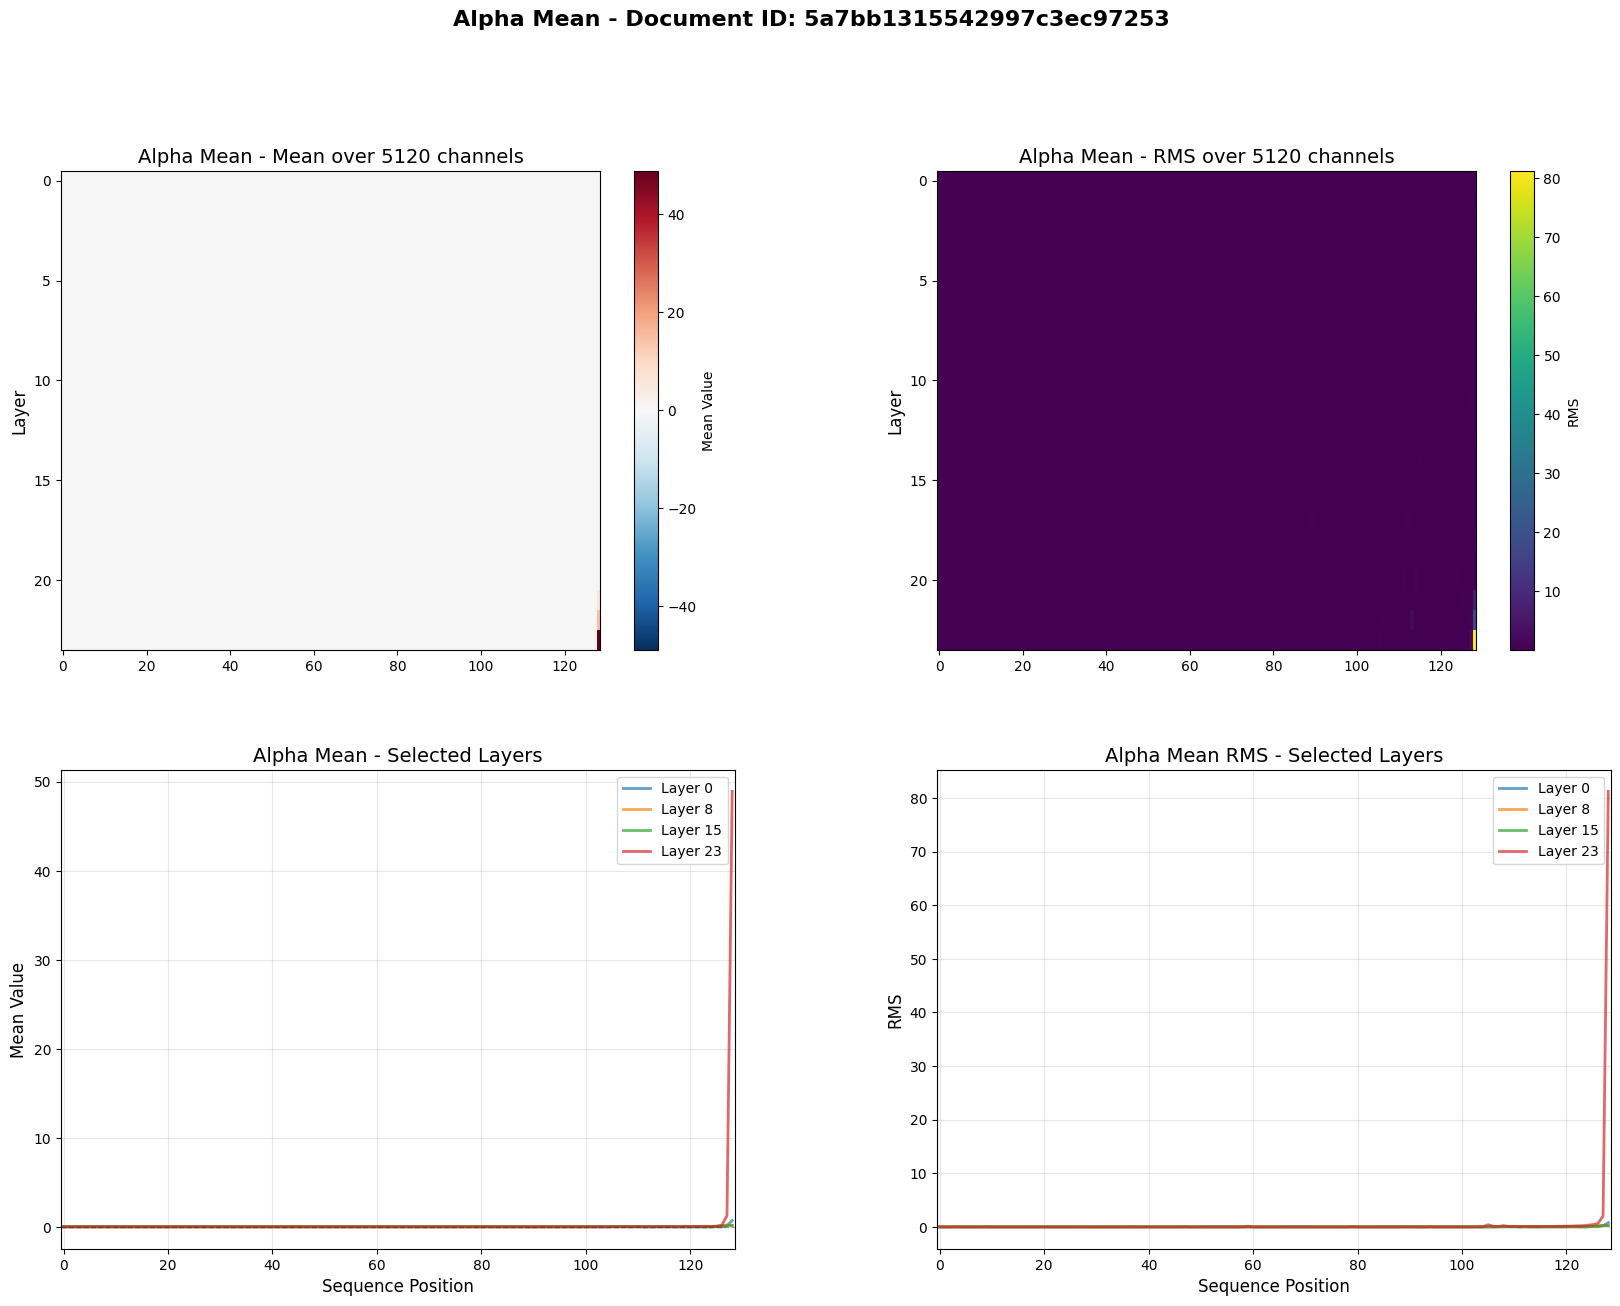

In [ ]:
# Visualize Alpha Mean - Averaged and RMS over channels
alpha_mean = data['alpha_mean']  # [64, seqlen, 5120]

# Average across all channels to get [64, seqlen]
alpha_mean_avg = alpha_mean.mean(dim=2).cpu().numpy()

# RMS (Root Mean Square) across all channels to get [64, seqlen]
alpha_mean_rms = torch.sqrt((alpha_mean ** 2).mean(dim=2)).cpu().numpy()

print(f"Alpha mean shape after averaging: {alpha_mean_avg.shape}")
print(f"Alpha mean shape after RMS: {alpha_mean_rms.shape}")
print(f"Alpha mean avg range: [{alpha_mean_avg.min():.6f}, {alpha_mean_avg.max():.6f}]")
print(f"Alpha mean RMS range: [{alpha_mean_rms.min():.6f}, {alpha_mean_rms.max():.6f}]")

# Create figure with 2x2 subplots, share x-axis within columns
fig, axes = plt.subplots(2, 2, figsize=(20, 14), 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.3})

# Share x-axis between rows for each column
axes[1, 0].sharex(axes[0, 0])
axes[1, 1].sharex(axes[0, 1])

# Add main title with doc2_id
fig.suptitle(f"Alpha Mean - Document ID: {data['doc2_id']}", fontsize=16, fontweight='bold', y=0.995)

# Selected representative layers
selected_layers = [0, 8, 15, 23]

# Top Left: Average Heatmap - use diverging colormap for data with positive and negative values
vmax = max(abs(alpha_mean_avg.min()), abs(alpha_mean_avg.max()))
im1 = axes[0, 0].imshow(alpha_mean_avg, aspect='auto', cmap='RdBu_r', 
                        interpolation='nearest', vmin=-vmax, vmax=vmax)
axes[0, 0].set_ylabel('Layer', fontsize=12)
axes[0, 0].set_title('Alpha Mean - Mean over 5120 channels', fontsize=14)
plt.colorbar(im1, ax=axes[0, 0], label='Mean Value')

# Top Right: RMS Heatmap - RMS is always non-negative
im2 = axes[0, 1].imshow(alpha_mean_rms, aspect='auto', cmap='viridis', interpolation='nearest')
axes[0, 1].set_ylabel('Layer', fontsize=12)
axes[0, 1].set_title('Alpha Mean - RMS over 5120 channels', fontsize=14)
plt.colorbar(im2, ax=axes[0, 1], label='RMS')

# Bottom Left: Line plot for Mean
for layer in selected_layers:
    axes[1, 0].plot(alpha_mean_avg[layer], label=f'Layer {layer}', alpha=0.7, linewidth=2)
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
axes[1, 0].set_xlabel('Sequence Position', fontsize=12)
axes[1, 0].set_ylabel('Mean Value', fontsize=12)
axes[1, 0].set_title('Alpha Mean - Selected Layers', fontsize=14)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Bottom Right: Line plot for RMS
for layer in selected_layers:
    axes[1, 1].plot(alpha_mean_rms[layer], label=f'Layer {layer}', alpha=0.7, linewidth=2)
axes[1, 1].set_xlabel('Sequence Position', fontsize=12)
axes[1, 1].set_ylabel('RMS', fontsize=12)
axes[1, 1].set_title('Alpha Mean RMS - Selected Layers', fontsize=14)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Alpha std shape after averaging: (24, 129)
Alpha std shape after RMS: (24, 129)
Alpha std avg range: [0.000000, 3.316583]
Alpha std RMS range: [0.000000, 5.225805]


/tmp/ipykernel_656992/617519371.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


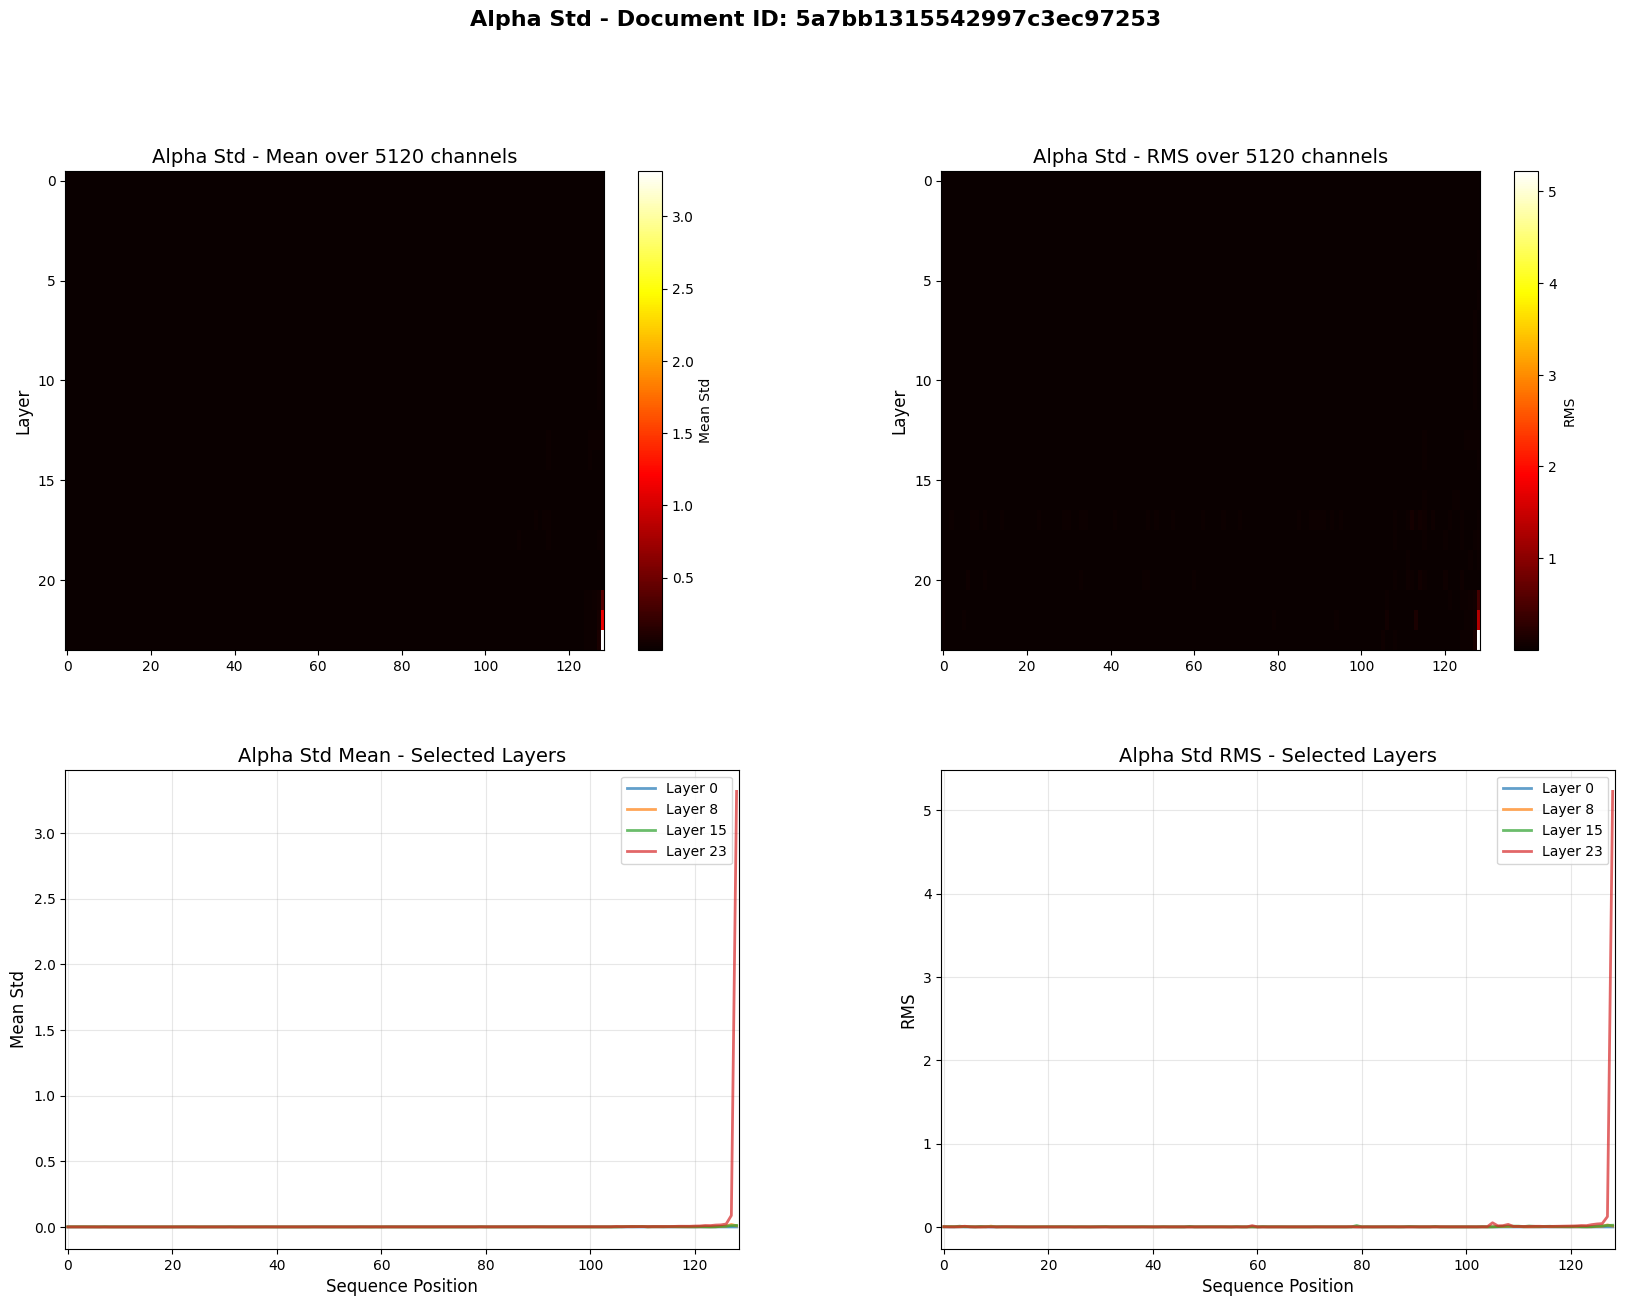

In [ ]:
# Visualize Alpha Std (from Variance) - Averaged and RMS over channels
alpha_var = data['alpha_var']  # [64, seqlen, 5120]

# Convert variance to standard deviation
alpha_std = torch.sqrt(alpha_var)  # [64, seqlen, 5120]

# Average across all channels to get [64, seqlen]
alpha_std_avg = alpha_std.mean(dim=2).cpu().numpy()

# RMS (Root Mean Square) across all channels to get [64, seqlen]
alpha_std_rms = torch.sqrt((alpha_std ** 2).mean(dim=2)).cpu().numpy()

print(f"Alpha std shape after averaging: {alpha_std_avg.shape}")
print(f"Alpha std shape after RMS: {alpha_std_rms.shape}")
print(f"Alpha std avg range: [{alpha_std_avg.min():.6f}, {alpha_std_avg.max():.6f}]")
print(f"Alpha std RMS range: [{alpha_std_rms.min():.6f}, {alpha_std_rms.max():.6f}]")

# Create figure with 2x2 subplots, share x-axis within columns
fig, axes = plt.subplots(2, 2, figsize=(20, 14),
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.3})

# Share x-axis between rows for each column
axes[1, 0].sharex(axes[0, 0])
axes[1, 1].sharex(axes[0, 1])

# Add main title with doc2_id
fig.suptitle(f"Alpha Std - Document ID: {data['doc2_id']}", fontsize=16, fontweight='bold', y=0.995)

# Selected representative layers
# selected_layers = [0, 31, 47, 55, 63]

# Top Left: Average Heatmap
im1 = axes[0, 0].imshow(alpha_std_avg, aspect='auto', cmap='hot', interpolation='nearest')
axes[0, 0].set_ylabel('Layer', fontsize=12)
axes[0, 0].set_title('Alpha Std - Mean over 5120 channels', fontsize=14)
plt.colorbar(im1, ax=axes[0, 0], label='Mean Std')

# Top Right: RMS Heatmap
im2 = axes[0, 1].imshow(alpha_std_rms, aspect='auto', cmap='hot', interpolation='nearest')
axes[0, 1].set_ylabel('Layer', fontsize=12)
axes[0, 1].set_title('Alpha Std - RMS over 5120 channels', fontsize=14)
plt.colorbar(im2, ax=axes[0, 1], label='RMS')

# Bottom Left: Line plot for Mean
for layer in selected_layers:
    axes[1, 0].plot(alpha_std_avg[layer], label=f'Layer {layer}', alpha=0.7, linewidth=2)
axes[1, 0].set_xlabel('Sequence Position', fontsize=12)
axes[1, 0].set_ylabel('Mean Std', fontsize=12)
axes[1, 0].set_title('Alpha Std Mean - Selected Layers', fontsize=14)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Bottom Right: Line plot for RMS
for layer in selected_layers:
    axes[1, 1].plot(alpha_std_rms[layer], label=f'Layer {layer}', alpha=0.7, linewidth=2)
axes[1, 1].set_xlabel('Sequence Position', fontsize=12)
axes[1, 1].set_ylabel('RMS', fontsize=12)
axes[1, 1].set_title('Alpha Std RMS - Selected Layers', fontsize=14)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Beta mean (last token) shape: torch.Size([24, 1536, 16])
Beta mean avg over all: (24,)
Beta mean avg over d_state: (24, 1536)
Beta mean avg over d_state range: [-1.304776, 0.642329]
Beta mean RMS over d_state range: [0.000000, 3.723642]


/tmp/ipykernel_656992/2798880921.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


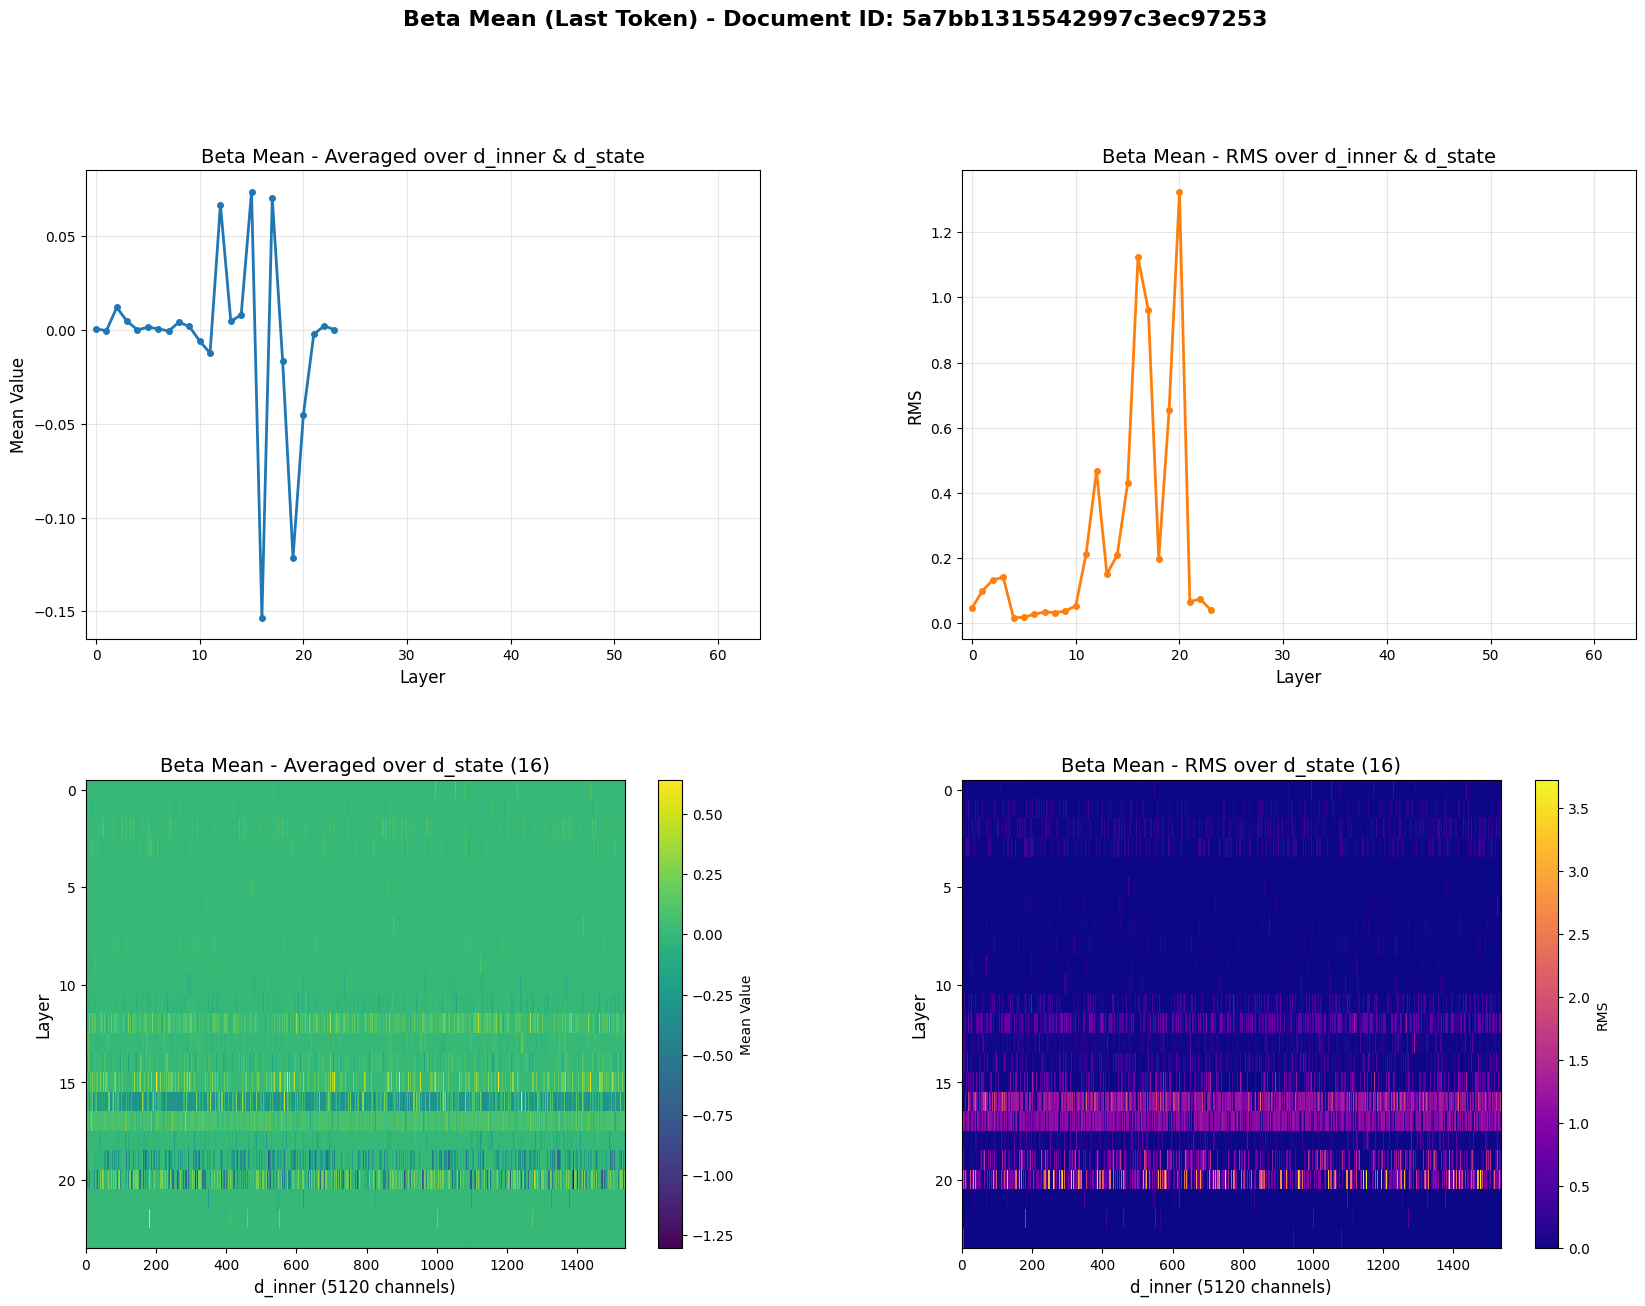

In [ ]:
# Visualize Beta Mean (last token only) - Analysis across dimensions
beta_mean = data['beta_mean']  # [64, 4, 5120, 16]
beta_mean_last = beta_mean[:, -1, :, :]  # Take only last token: [64, 5120, 16]

# Average across d_inner (5120) and d_state (16) dimensions for overall view
beta_mean_avg_all = beta_mean_last.mean(dim=(1, 2)).cpu().numpy()  # [64]
beta_mean_rms_all = torch.sqrt((beta_mean_last ** 2).mean(dim=(1, 2))).cpu().numpy()  # [64]

# Average and RMS across d_state (16) only, keeping layer and d_inner
beta_mean_avg_dstate = beta_mean_last.mean(dim=2).cpu().numpy()  # [64, 5120]
beta_mean_rms_dstate = torch.sqrt((beta_mean_last ** 2).mean(dim=2)).cpu().numpy()  # [64, 5120]

print(f"Beta mean (last token) shape: {beta_mean_last.shape}")
print(f"Beta mean avg over all: {beta_mean_avg_all.shape}")
print(f"Beta mean avg over d_state: {beta_mean_avg_dstate.shape}")
print(f"Beta mean avg over d_state range: [{beta_mean_avg_dstate.min():.6f}, {beta_mean_avg_dstate.max():.6f}]")
print(f"Beta mean RMS over d_state range: [{beta_mean_rms_dstate.min():.6f}, {beta_mean_rms_dstate.max():.6f}]")

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14),
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

# Add main title with doc2_id
fig.suptitle(f"Beta Mean (Last Token) - Document ID: {data['doc2_id']}", 
             fontsize=16, fontweight='bold', y=0.995)

# Top Left: Overall Mean across layers
axes[0, 0].plot(beta_mean_avg_all, marker='o', linewidth=2, markersize=4, color='#1f77b4')
axes[0, 0].set_xlabel('Layer', fontsize=12)
axes[0, 0].set_ylabel('Mean Value', fontsize=12)
axes[0, 0].set_title('Beta Mean - Averaged over d_inner & d_state', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(-1, 64)

# Top Right: Overall RMS across layers
axes[0, 1].plot(beta_mean_rms_all, marker='o', linewidth=2, markersize=4, color='#ff7f0e')
axes[0, 1].set_xlabel('Layer', fontsize=12)
axes[0, 1].set_ylabel('RMS', fontsize=12)
axes[0, 1].set_title('Beta Mean - RMS over d_inner & d_state', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(-1, 64)

# Bottom Left: Heatmap - Average over d_state
im1 = axes[1, 0].imshow(beta_mean_avg_dstate, aspect='auto', cmap='viridis', interpolation='nearest')
axes[1, 0].set_xlabel('d_inner (5120 channels)', fontsize=12)
axes[1, 0].set_ylabel('Layer', fontsize=12)
axes[1, 0].set_title('Beta Mean - Averaged over d_state (16)', fontsize=14)
plt.colorbar(im1, ax=axes[1, 0], label='Mean Value')

# Bottom Right: Heatmap - RMS over d_state
im2 = axes[1, 1].imshow(beta_mean_rms_dstate, aspect='auto', cmap='plasma', interpolation='nearest')
axes[1, 1].set_xlabel('d_inner (5120 channels)', fontsize=12)
axes[1, 1].set_ylabel('Layer', fontsize=12)
axes[1, 1].set_title('Beta Mean - RMS over d_state (16)', fontsize=14)
plt.colorbar(im2, ax=axes[1, 1], label='RMS')

plt.tight_layout()
plt.show()

Beta std (last token) shape: torch.Size([24, 1536, 16])
Beta std avg over all: (24,)
Beta std avg over d_state: (24, 1536)
Beta std avg over d_state range: [0.000000, 0.313237]
Beta std RMS over d_state range: [0.000000, 0.344850]


/tmp/ipykernel_656992/3043990946.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


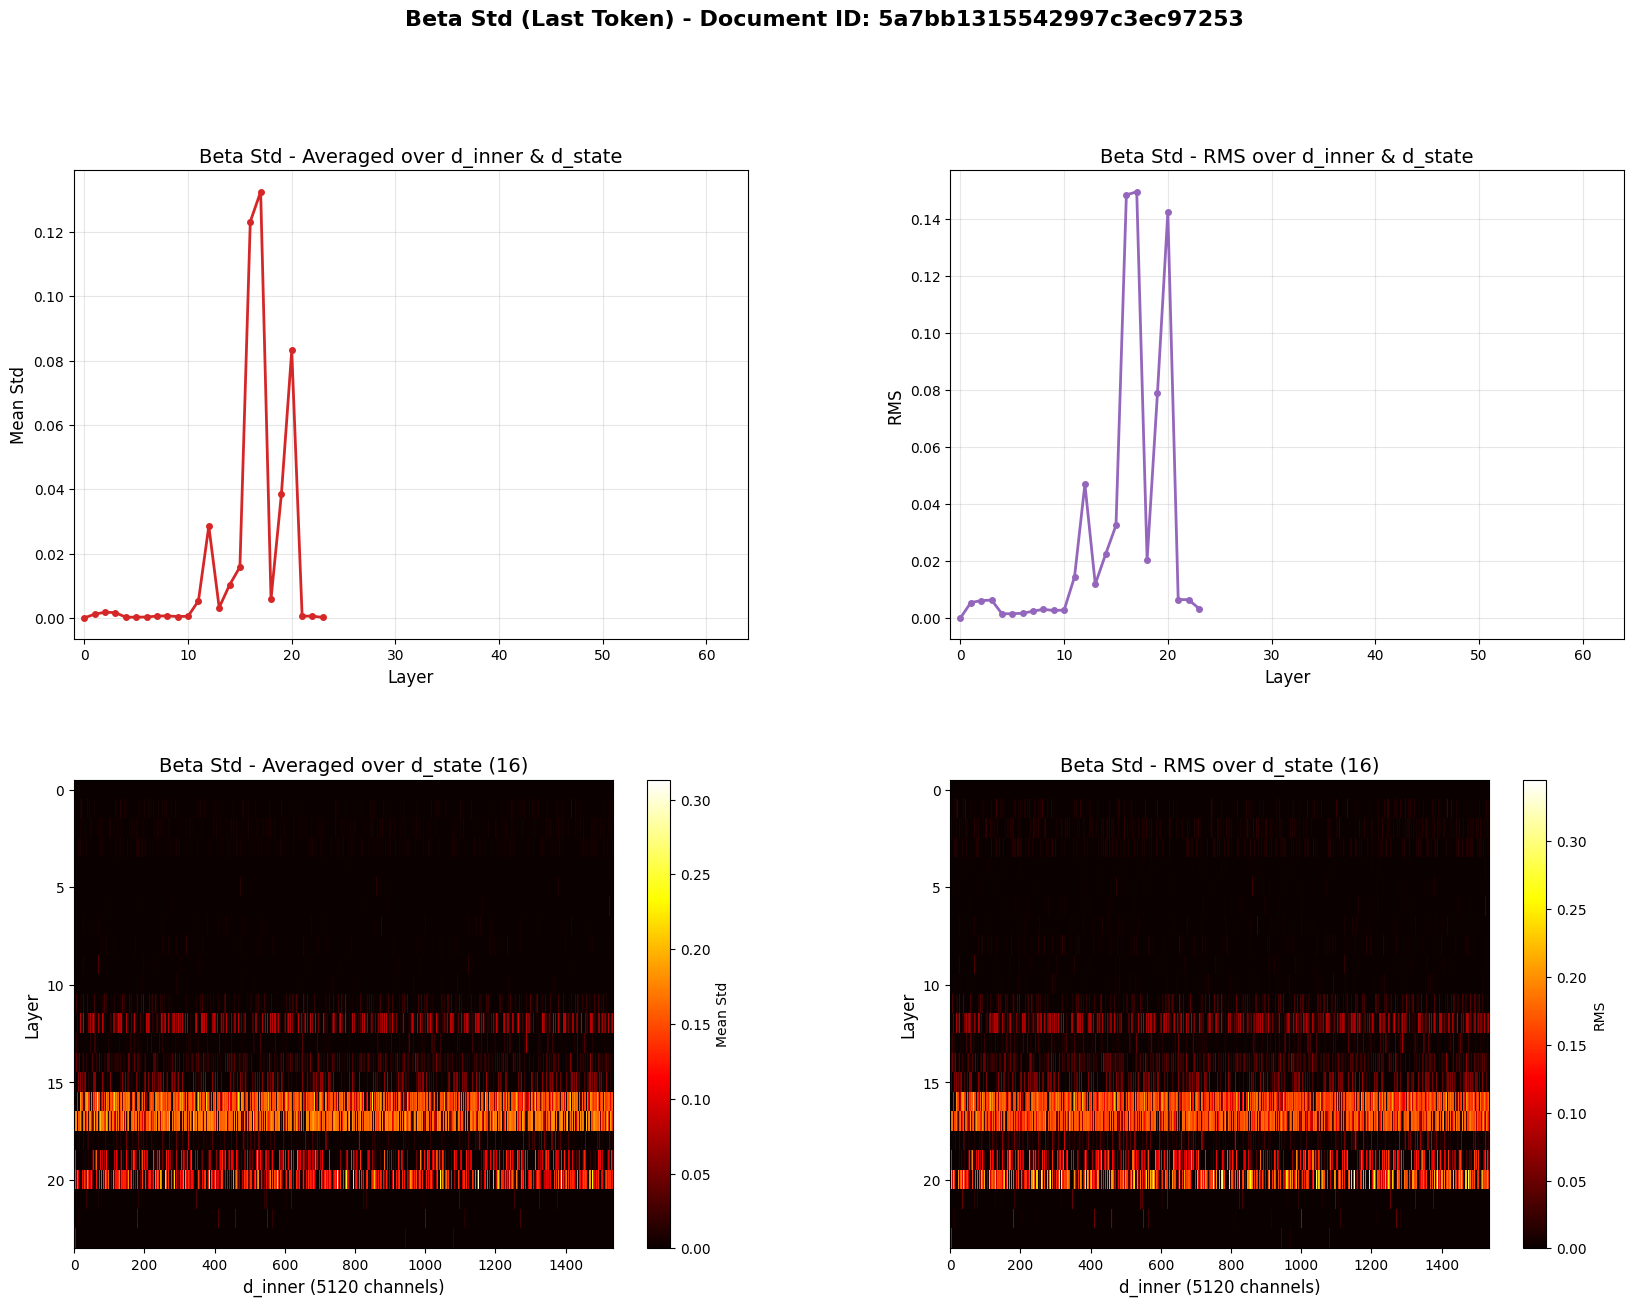

In [ ]:
# Visualize Beta Std (last token only, from variance) - Analysis across dimensions
beta_var = data['beta_var']  # [64, 4, 5120, 16]
beta_var_last = beta_var[:, -1, :, :]  # Take only last token: [64, 5120, 16]

# Convert variance to standard deviation
beta_std_last = torch.sqrt(beta_var_last)  # [64, 5120, 16]

# Average across d_inner (5120) and d_state (16) dimensions for overall view
beta_std_avg_all = beta_std_last.mean(dim=(1, 2)).cpu().numpy()  # [64]
beta_std_rms_all = torch.sqrt((beta_std_last ** 2).mean(dim=(1, 2))).cpu().numpy()  # [64]

# Average and RMS across d_state (16) only, keeping layer and d_inner
beta_std_avg_dstate = beta_std_last.mean(dim=2).cpu().numpy()  # [64, 5120]
beta_std_rms_dstate = torch.sqrt((beta_std_last ** 2).mean(dim=2)).cpu().numpy()  # [64, 5120]

print(f"Beta std (last token) shape: {beta_std_last.shape}")
print(f"Beta std avg over all: {beta_std_avg_all.shape}")
print(f"Beta std avg over d_state: {beta_std_avg_dstate.shape}")
print(f"Beta std avg over d_state range: [{beta_std_avg_dstate.min():.6f}, {beta_std_avg_dstate.max():.6f}]")
print(f"Beta std RMS over d_state range: [{beta_std_rms_dstate.min():.6f}, {beta_std_rms_dstate.max():.6f}]")

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14),
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

# Add main title with doc2_id
fig.suptitle(f"Beta Std (Last Token) - Document ID: {data['doc2_id']}", 
             fontsize=16, fontweight='bold', y=0.995)

# Top Left: Overall Mean across layers
axes[0, 0].plot(beta_std_avg_all, marker='o', linewidth=2, markersize=4, color='#d62728')
axes[0, 0].set_xlabel('Layer', fontsize=12)
axes[0, 0].set_ylabel('Mean Std', fontsize=12)
axes[0, 0].set_title('Beta Std - Averaged over d_inner & d_state', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(-1, 64)

# Top Right: Overall RMS across layers
axes[0, 1].plot(beta_std_rms_all, marker='o', linewidth=2, markersize=4, color='#9467bd')
axes[0, 1].set_xlabel('Layer', fontsize=12)
axes[0, 1].set_ylabel('RMS', fontsize=12)
axes[0, 1].set_title('Beta Std - RMS over d_inner & d_state', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(-1, 64)

# Bottom Left: Heatmap - Average over d_state
im1 = axes[1, 0].imshow(beta_std_avg_dstate, aspect='auto', cmap='hot', interpolation='nearest')
axes[1, 0].set_xlabel('d_inner (5120 channels)', fontsize=12)
axes[1, 0].set_ylabel('Layer', fontsize=12)
axes[1, 0].set_title('Beta Std - Averaged over d_state (16)', fontsize=14)
plt.colorbar(im1, ax=axes[1, 0], label='Mean Std')

# Bottom Right: Heatmap - RMS over d_state
im2 = axes[1, 1].imshow(beta_std_rms_dstate, aspect='auto', cmap='hot', interpolation='nearest')
axes[1, 1].set_xlabel('d_inner (5120 channels)', fontsize=12)
axes[1, 1].set_ylabel('Layer', fontsize=12)
axes[1, 1].set_title('Beta Std - RMS over d_state (16)', fontsize=14)
plt.colorbar(im2, ax=axes[1, 1], label='RMS')

plt.tight_layout()
plt.show()

Alpha CV shape: torch.Size([24, 129, 1536])
Alpha CV shape after averaging: (24, 129)
Alpha CV shape after RMS: (24, 129)
Alpha CV avg range: [0.000050, 28.739153]
Alpha CV RMS range: [0.000081, 1041.426025]


/tmp/ipykernel_656992/3828417749.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


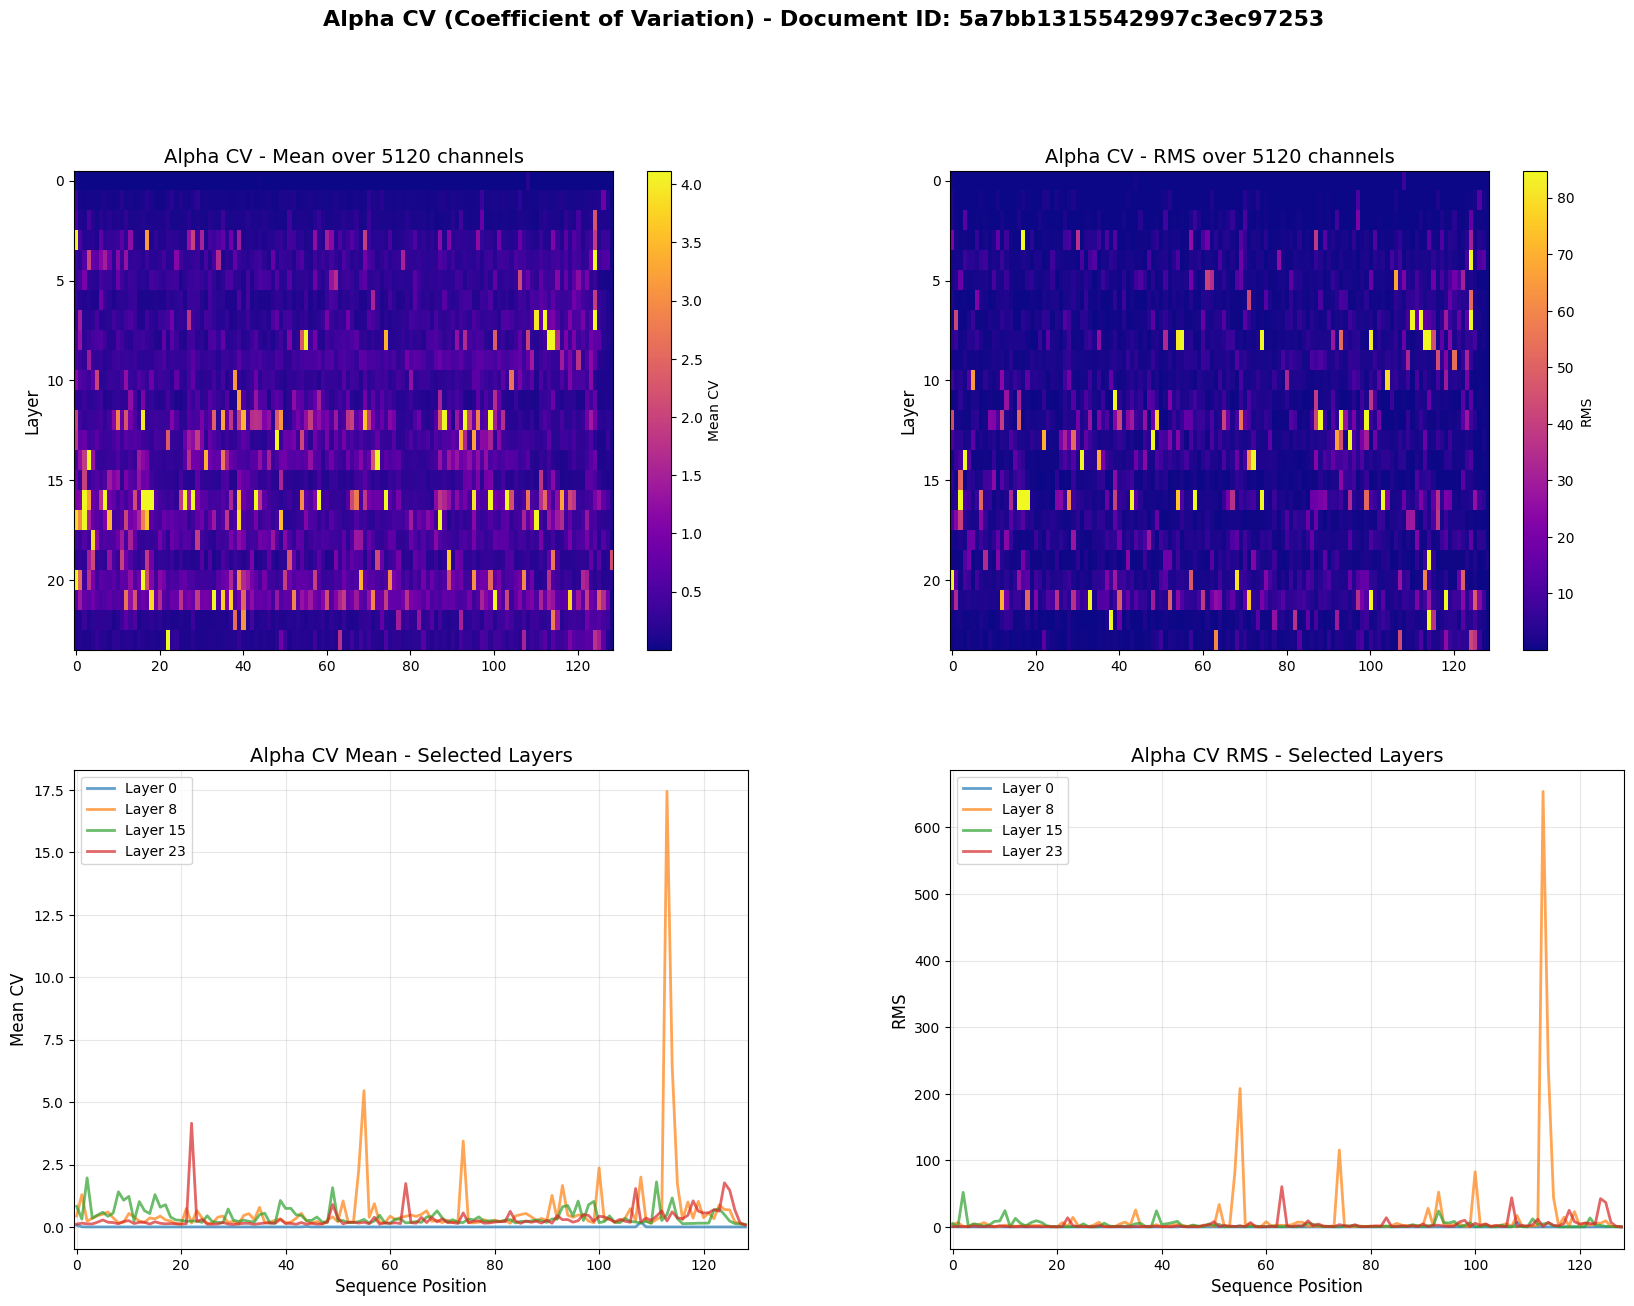

In [ ]:
# Visualize Alpha CV (Coefficient of Variation) - CV = std / mean
# First calculate CV at each point, then reduce across channels
alpha_mean = data['alpha_mean']  # [64, seqlen, 5120]
alpha_var = data['alpha_var']  # [64, seqlen, 5120]
alpha_std = torch.sqrt(alpha_var)  # [64, seqlen, 5120]

# Calculate CV at each point: CV = std / mean (with epsilon to avoid division by zero)
epsilon = 1e-8
alpha_cv = alpha_std / (torch.abs(alpha_mean) + epsilon)  # [64, seqlen, 5120]

# Average across all channels to get [64, seqlen]
alpha_cv_avg = alpha_cv.mean(dim=2).cpu().numpy()

# RMS (Root Mean Square) across all channels to get [64, seqlen]
alpha_cv_rms = torch.sqrt((alpha_cv ** 2).mean(dim=2)).cpu().numpy()

print(f"Alpha CV shape: {alpha_cv.shape}")
print(f"Alpha CV shape after averaging: {alpha_cv_avg.shape}")
print(f"Alpha CV shape after RMS: {alpha_cv_rms.shape}")
print(f"Alpha CV avg range: [{alpha_cv_avg.min():.6f}, {alpha_cv_avg.max():.6f}]")
print(f"Alpha CV RMS range: [{alpha_cv_rms.min():.6f}, {alpha_cv_rms.max():.6f}]")

# Create figure with 2x2 subplots, share x-axis within columns
fig, axes = plt.subplots(2, 2, figsize=(20, 14),
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.3})

# Share x-axis between rows for each column
axes[1, 0].sharex(axes[0, 0])
axes[1, 1].sharex(axes[0, 1])

# Add main title with doc2_id
fig.suptitle(f"Alpha CV (Coefficient of Variation) - Document ID: {data['doc2_id']}", 
             fontsize=16, fontweight='bold', y=0.995)

# Selected representative layers
# selected_layers = [0, 31, 47, 55, 63]

# Top Left: Average Heatmap (use percentile for better contrast)
vmin_avg = np.percentile(alpha_cv_avg, 1)
vmax_avg = np.percentile(alpha_cv_avg, 99)
im1 = axes[0, 0].imshow(alpha_cv_avg, aspect='auto', cmap='plasma', 
                        interpolation='nearest', vmin=vmin_avg, vmax=vmax_avg)
axes[0, 0].set_ylabel('Layer', fontsize=12)
axes[0, 0].set_title('Alpha CV - Mean over 5120 channels', fontsize=14)
plt.colorbar(im1, ax=axes[0, 0], label='Mean CV')

# Top Right: RMS Heatmap (use percentile for better contrast)
vmin_rms = np.percentile(alpha_cv_rms, 1)
vmax_rms = np.percentile(alpha_cv_rms, 99)
im2 = axes[0, 1].imshow(alpha_cv_rms, aspect='auto', cmap='plasma', 
                        interpolation='nearest', vmin=vmin_rms, vmax=vmax_rms)
axes[0, 1].set_ylabel('Layer', fontsize=12)
axes[0, 1].set_title('Alpha CV - RMS over 5120 channels', fontsize=14)
plt.colorbar(im2, ax=axes[0, 1], label='RMS')

# Bottom Left: Line plot for Mean
for layer in selected_layers:
    axes[1, 0].plot(alpha_cv_avg[layer], label=f'Layer {layer}', alpha=0.7, linewidth=2)
axes[1, 0].set_xlabel('Sequence Position', fontsize=12)
axes[1, 0].set_ylabel('Mean CV', fontsize=12)
axes[1, 0].set_title('Alpha CV Mean - Selected Layers', fontsize=14)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Bottom Right: Line plot for RMS
for layer in selected_layers:
    axes[1, 1].plot(alpha_cv_rms[layer], label=f'Layer {layer}', alpha=0.7, linewidth=2)
axes[1, 1].set_xlabel('Sequence Position', fontsize=12)
axes[1, 1].set_ylabel('RMS', fontsize=12)
axes[1, 1].set_title('Alpha CV RMS - Selected Layers', fontsize=14)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Beta CV (last token) shape: torch.Size([24, 1536, 16])
Beta CV avg over all: (24,)
Beta CV avg over d_state: (24, 1536)
Beta CV avg over d_state range: [0.000000, 36670.718750]
Beta CV RMS over d_state range: [0.000000, 146679.250000]


/tmp/ipykernel_656992/2885031169.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


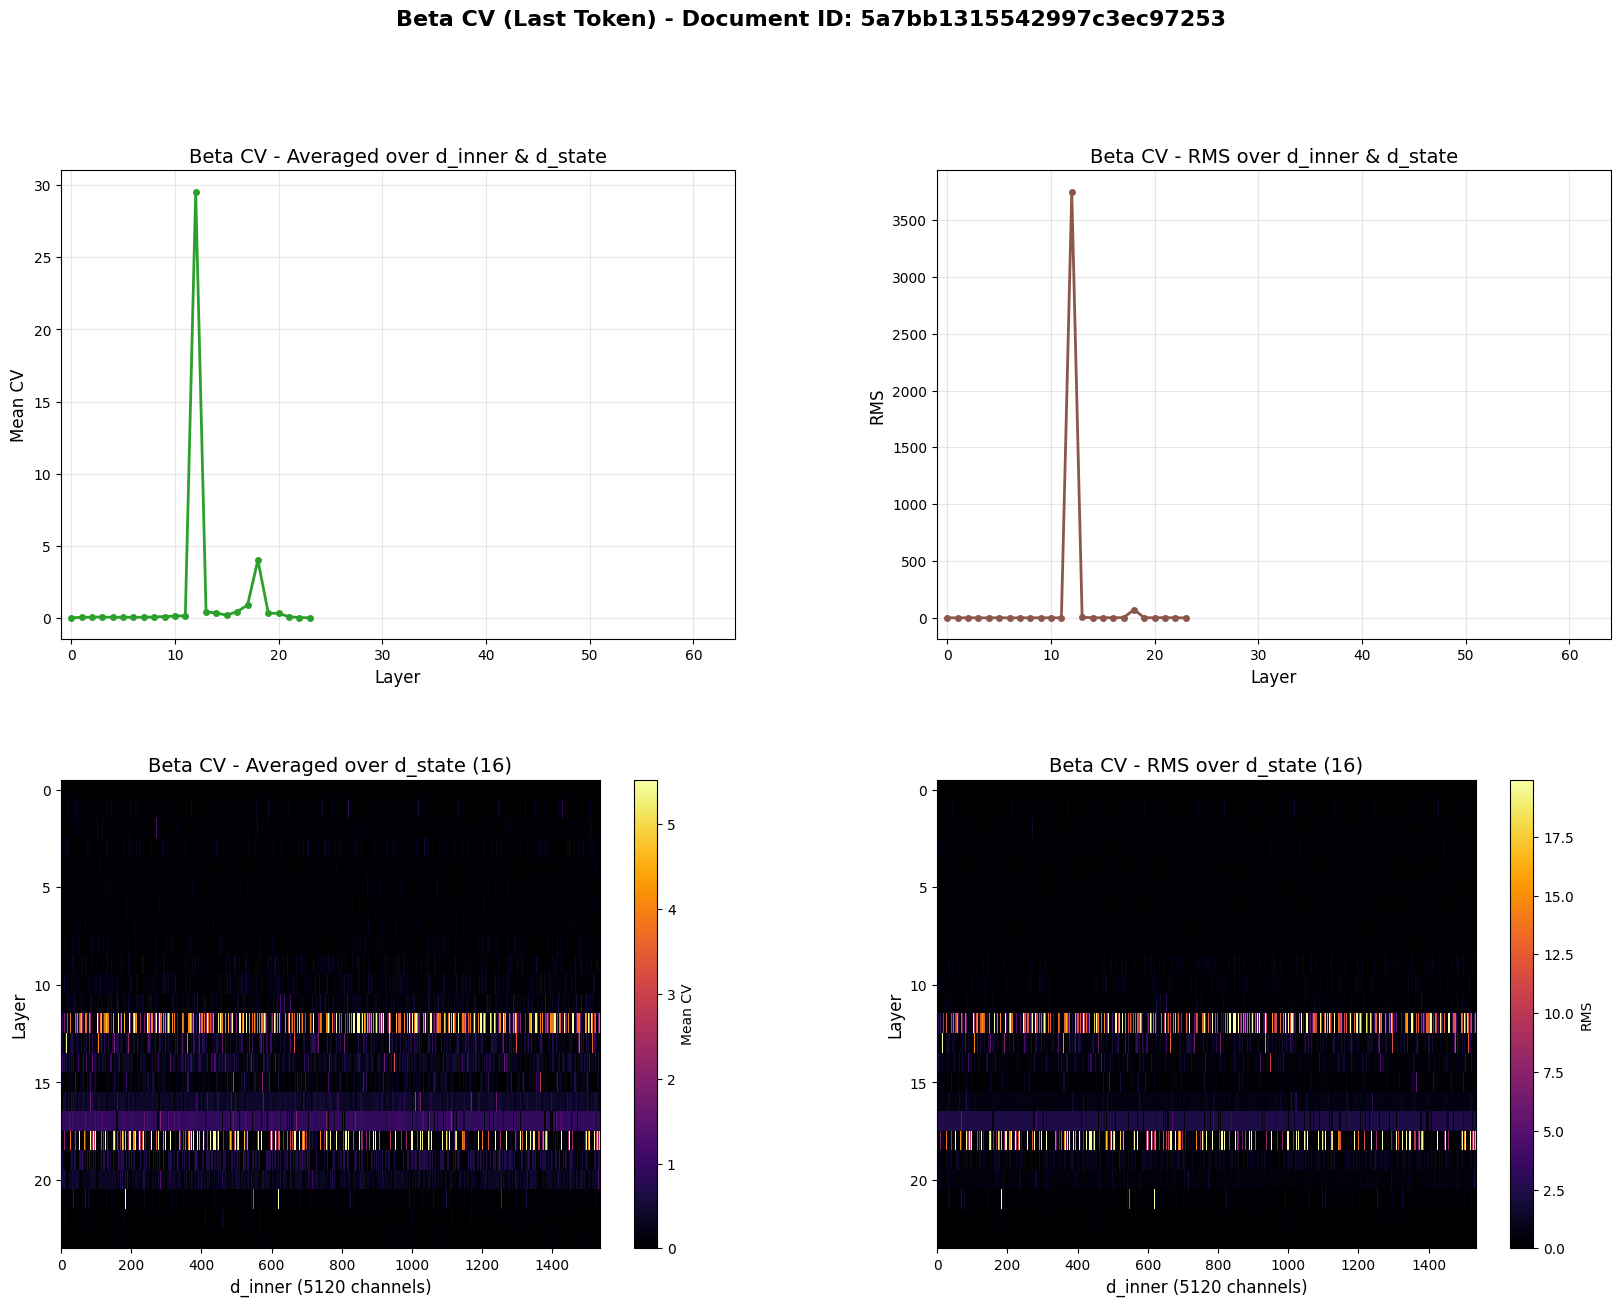

In [ ]:
# Visualize Beta CV (Coefficient of Variation, last token only) - CV = std / mean
# First calculate CV at each point, then reduce across dimensions
beta_mean = data['beta_mean']  # [64, 4, 5120, 16]
beta_var = data['beta_var']  # [64, 4, 5120, 16]

beta_mean_last = beta_mean[:, -1, :, :]  # Take only last token: [64, 5120, 16]
beta_var_last = beta_var[:, -1, :, :]  # Take only last token: [64, 5120, 16]

# Convert variance to standard deviation
beta_std_last = torch.sqrt(beta_var_last)  # [64, 5120, 16]

# Calculate CV at each point: CV = std / mean (with epsilon to avoid division by zero)
epsilon = 1e-8
beta_cv_last = beta_std_last / (torch.abs(beta_mean_last) + epsilon)  # [64, 5120, 16]

# Average across d_inner (5120) and d_state (16) dimensions for overall view
beta_cv_avg_all = beta_cv_last.mean(dim=(1, 2)).cpu().numpy()  # [64]
beta_cv_rms_all = torch.sqrt((beta_cv_last ** 2).mean(dim=(1, 2))).cpu().numpy()  # [64]

# Average and RMS across d_state (16) only, keeping layer and d_inner
beta_cv_avg_dstate = beta_cv_last.mean(dim=2).cpu().numpy()  # [64, 5120]
beta_cv_rms_dstate = torch.sqrt((beta_cv_last ** 2).mean(dim=2)).cpu().numpy()  # [64, 5120]

print(f"Beta CV (last token) shape: {beta_cv_last.shape}")
print(f"Beta CV avg over all: {beta_cv_avg_all.shape}")
print(f"Beta CV avg over d_state: {beta_cv_avg_dstate.shape}")
print(f"Beta CV avg over d_state range: [{beta_cv_avg_dstate.min():.6f}, {beta_cv_avg_dstate.max():.6f}]")
print(f"Beta CV RMS over d_state range: [{beta_cv_rms_dstate.min():.6f}, {beta_cv_rms_dstate.max():.6f}]")

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14),
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

# Add main title with doc2_id
fig.suptitle(f"Beta CV (Last Token) - Document ID: {data['doc2_id']}", 
             fontsize=16, fontweight='bold', y=0.995)

# Top Left: Overall Mean across layers
axes[0, 0].plot(beta_cv_avg_all, marker='o', linewidth=2, markersize=4, color='#2ca02c')
axes[0, 0].set_xlabel('Layer', fontsize=12)
axes[0, 0].set_ylabel('Mean CV', fontsize=12)
axes[0, 0].set_title('Beta CV - Averaged over d_inner & d_state', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(-1, 64)

# Top Right: Overall RMS across layers
axes[0, 1].plot(beta_cv_rms_all, marker='o', linewidth=2, markersize=4, color='#8c564b')
axes[0, 1].set_xlabel('Layer', fontsize=12)
axes[0, 1].set_ylabel('RMS', fontsize=12)
axes[0, 1].set_title('Beta CV - RMS over d_inner & d_state', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(-1, 64)

# Bottom Left: Heatmap - Average over d_state (use percentile for better contrast)
vmin_avg = np.percentile(beta_cv_avg_dstate, 1)
vmax_avg = np.percentile(beta_cv_avg_dstate, 99)
im1 = axes[1, 0].imshow(beta_cv_avg_dstate, aspect='auto', cmap='inferno', 
                        interpolation='nearest', vmin=vmin_avg, vmax=vmax_avg)
axes[1, 0].set_xlabel('d_inner (5120 channels)', fontsize=12)
axes[1, 0].set_ylabel('Layer', fontsize=12)
axes[1, 0].set_title('Beta CV - Averaged over d_state (16)', fontsize=14)
plt.colorbar(im1, ax=axes[1, 0], label='Mean CV')

# Bottom Right: Heatmap - RMS over d_state (use percentile for better contrast)
vmin_rms = np.percentile(beta_cv_rms_dstate, 1)
vmax_rms = np.percentile(beta_cv_rms_dstate, 99)
im2 = axes[1, 1].imshow(beta_cv_rms_dstate, aspect='auto', cmap='inferno', 
                        interpolation='nearest', vmin=vmin_rms, vmax=vmax_rms)
axes[1, 1].set_xlabel('d_inner (5120 channels)', fontsize=12)
axes[1, 1].set_ylabel('Layer', fontsize=12)
axes[1, 1].set_title('Beta CV - RMS over d_state (16)', fontsize=14)
plt.colorbar(im2, ax=axes[1, 1], label='RMS')

plt.tight_layout()
plt.show()